<a href="https://colab.research.google.com/github/ullola17/datos_masivos_02/blob/main/IrisDataSetDatos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd #manipulación y análisis de datos
import numpy as np #operaciones numéricas y manipulación de arrays
import matplotlib.pyplot as plt #crear gráficos y visualizaciones de datos
import seaborn as sns #creación de gráficos
from sklearn.cluster import KMeans

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
#Importamos la base de datos desde la pagina
df = pd.read_csv(
    'https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv')

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
#Sirve para saber si existen valores nulos que podrian crear un error
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
# Verificar valores nulos
df.isnull().sum()

# Valores nulos -> 0
df = df.fillna(0)

In [ ]:
setosa = df.loc[df['species']=='setosa']
virginica = df.loc[df['species'] == 'virginica']
versicolor = df.loc[df['species'] == 'versicolor']

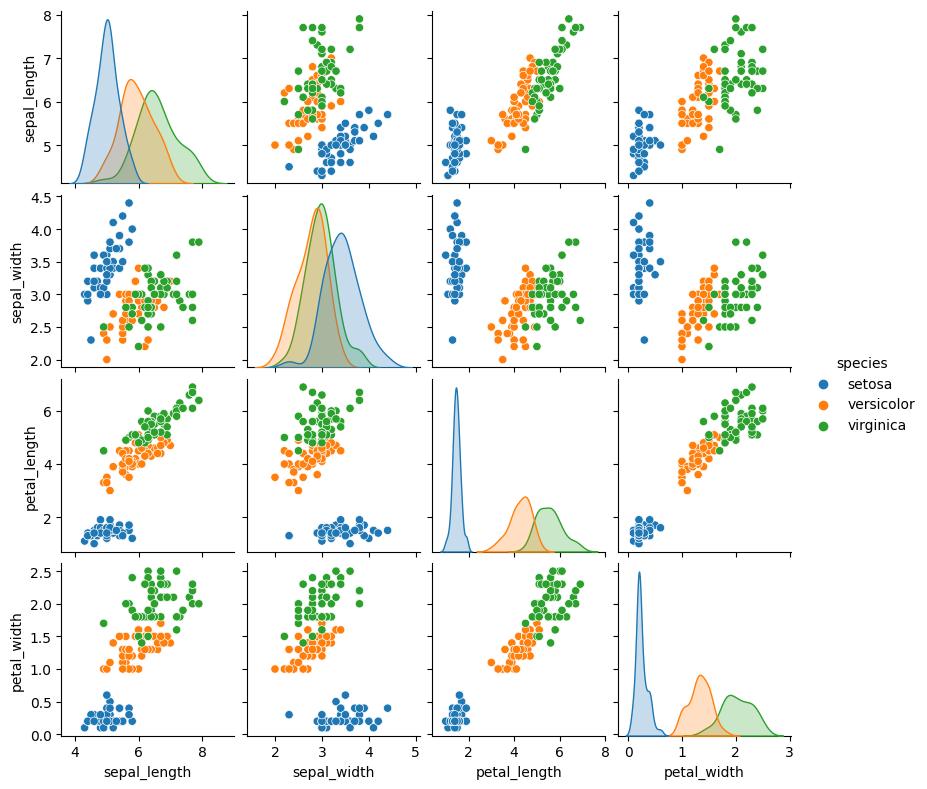

In [ ]:
sns.pairplot(sns.load_dataset("iris"), hue="species", height = 2)

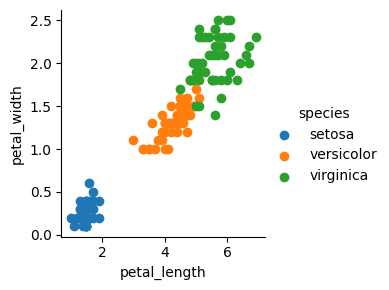

In [ ]:
sns.FacetGrid(hue= 'species' , data = df , height = 3).map(plt.scatter, 'petal_length', 'petal_width').add_legend()

<Axes: xlabel='species', ylabel='petal_length'>

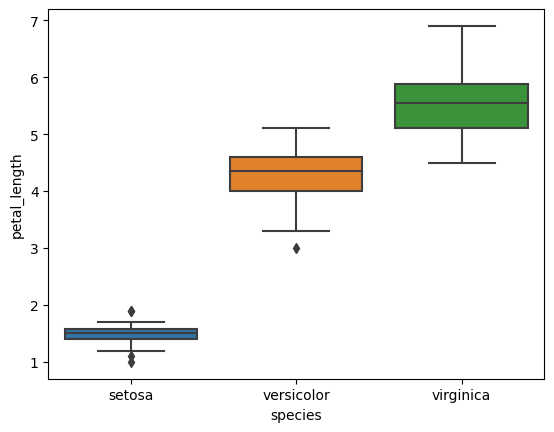

In [ ]:
sns.boxplot(x = 'species', y = 'petal_length', data = df)

<ipython-input-10-0d9b40a52ac1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


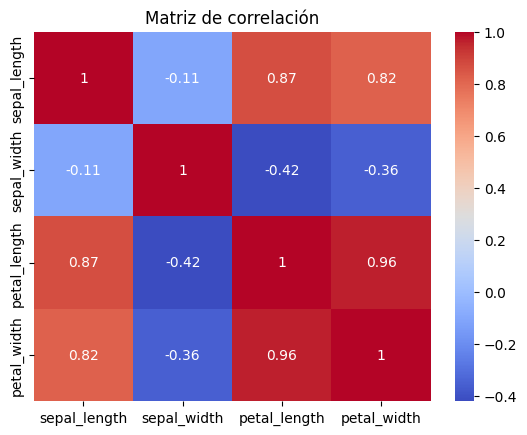

In [ ]:
#Matriz de correlación
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

In [ ]:
# Entrenamiento (80%) y prueba (20%)
X = df.drop('species', axis=1)
y = df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Modelo de árbol de decisión
model = DecisionTreeClassifier(random_state=42)

# Entrenar
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

In [ ]:
# Evaluar
accuracy = accuracy_score(y_test, y_pred)
print(f'Presición: {accuracy}')
print(classification_report(y_test, y_pred))

Presición: 1.0
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
X = pd.DataFrame()
X.loc[:,0] = df.loc[:,'sepal_length']
X.loc[:,1] = df.loc[:,'petal_length']

cls = KMeans(init='k-means++', n_clusters=3, n_init=10)
cls.fit(X)
X['predicted_label'] = cls.labels_.astype(int)
X.columns = ['sepal_length', 'petal_length','label']
X

,sepal_length,petal_length,label
0,5.1,1.4,1
1,4.9,1.4,1
2,4.7,1.3,1
3,4.6,1.5,1
4,5.0,1.4,1
...,...,...,...
145,6.7,5.2,2
146,6.3,5.0,0
147,6.5,5.2,2
148,6.2,5.4,2


[[5.87413793 4.39310345]
 [5.00784314 1.49411765]
 [6.83902439 5.67804878]]


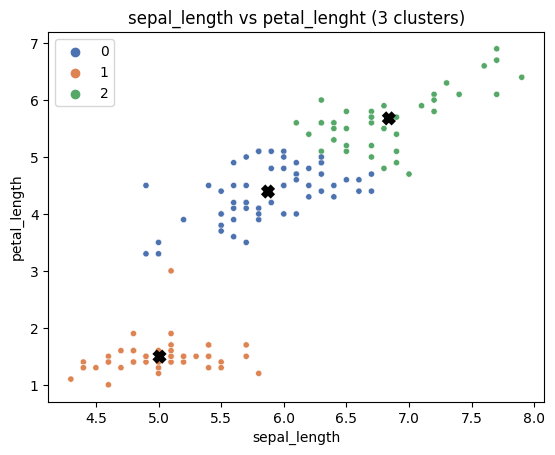

In [ ]:
centroids = cls.cluster_centers_
labels = cls.labels_
print(centroids)
centroids_x = centroids[:, 1]
centroids_y = centroids[:, 0]

sns.scatterplot(x="sepal_length", y="petal_length", hue="label",
                data=X, palette='deep', s=20);
plt.legend(loc='upper left');
plt.title("sepal_length vs petal_lenght (3 clusters)")
#plt.xlim([-10, 170])
#plt.ylim([-10, 120])
plt.scatter(centroids_y,centroids_x,marker = "x", s=10,linewidths = 10, zorder = 10, c=['black','black','black'])